In [ ]:
# David H. Nguyen, PhD. TSG Lab
# Last updated 3/8/25


In [ ]:
# Instructions
# The input csv file should be formatted as in the picture. 
# First column must be named "Category" and contain category labels that will be color-coded in the graph.
# Second column must be named "SampleName" and contain the sample names. 
# The features on which PCA will be done are in the 3rd column and to the end. 

# This script produces a file called "1st3PCvalues.csv" that contains the sample names PC values for the first 3 PCs. 
#    This is so you can graph the PCA results in an interactive 3D dotplot.



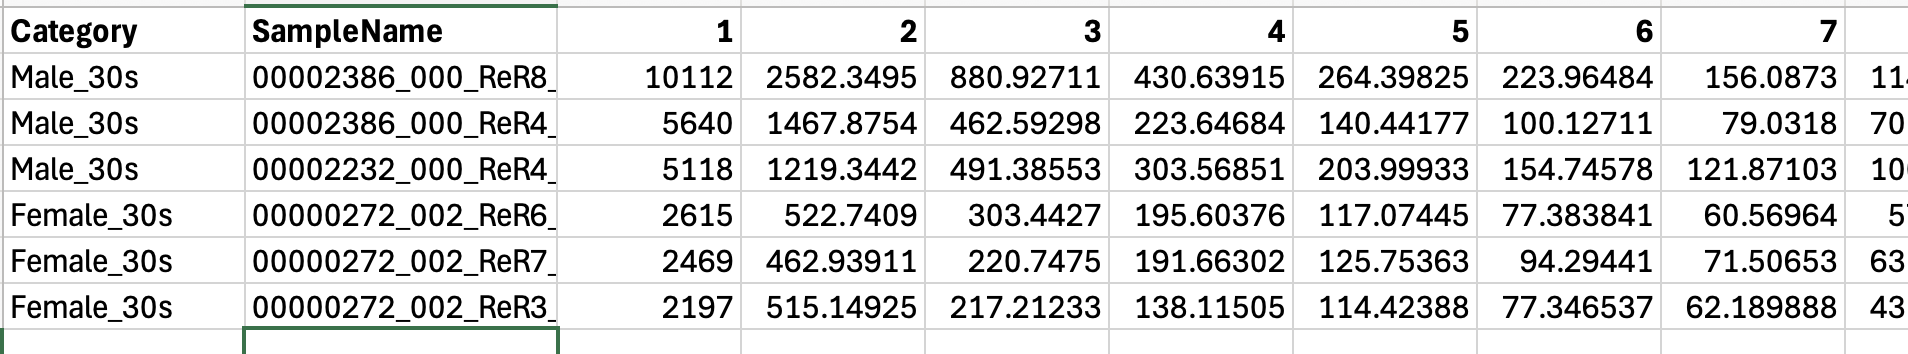


In [1]:
# Load the dependencies

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [8]:
# Set the working directory
os.chdir("/Users/davidnguyen/Documents/")  # Update with your file path

# Load the CSV file
file_path = "Gliomas_forPCA.csv"  # Update with the actual file path
df = pd.read_csv(file_path)

df.head()


Category          SampleName     1           2           3          4  \
0         9  cropped_axial0092_  2142  229.086791  127.240045  60.997754   
1         9  cropped_axial0090_  1532   75.321642  125.663651  61.659841   
2         9  cropped_axial0103_  1246   75.546103   82.757648  38.355759   
3         9  cropped_axial0094_  2502  100.198549  159.632188  27.658104   
4         9  cropped_axial0096_  2624   59.455214  166.063026  31.211523   

           5          6          7          8  ...        62         63  \
0   6.768564  18.288453   5.318570  29.074110  ...  9.908592  24.461804   
1  32.472321  27.627889  20.392305  11.436810  ...  1.928639   6.158902   
2   7.250629   9.600518  10.941335   9.792965  ...  9.548014  10.648598   
3  41.518557   8.766322  13.979472  21.626403  ...  4.882777  14.285927   
4  31.529122  23.160854   8.944272  13.742632  ...  6.352476  12.582731   

          64         65         66         67         68         69  \
0  14.137972   3.592073  29.074110   5.318570  18.288453   6.768564   
1   8.263430  27.256112  11.436810  20.392305  27.627889  32.472321   
2   8.828427  14.522103   9.792965  10.941335   9.600518   7.250629   
3  16.606159   9.412323  21.626403  13.979472   8.766322  41.518557   
4  13.911833  25.265827  13.742632   8.944272  23.160854  31.529122   

          70          71  
0  60.997754  127.240045  
1  61.659841  125.663651  
2  38.355759   82.757648  
3  27.658104  159.632188  
4  31.211523  166.063026  

[5 rows x 73 columns]

In [10]:

# Ensure the expected columns exist
if "Category" not in df.columns or "SampleName" not in df.columns:
    raise ValueError("Input data must have 'Category' as the first column and 'SampleName' as the second column.")

# Extract category and sample name columns
categories = df["Category"]
sample_names = df["SampleName"]

# Select numerical features starting from the 3rd column onward
features = df.iloc[:, 2:]  

# Fill empty cells with zeros
features = features.fillna(0)

In [12]:

# Perform PCA with 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(features)

# Create a DataFrame for the first three principal components and add category & sample names
pc_df = pd.DataFrame(principal_components, columns=["PC1", "PC2", "PC3"])
pc_df.insert(0, "Category", categories)  # Add category as the first column
pc_df.insert(1, "SampleName", sample_names)  # Add sample names as the second column

# Save the table to a CSV file
pc_df.to_csv("1st3PCvalues.csv", index=False)  # Save without the default index



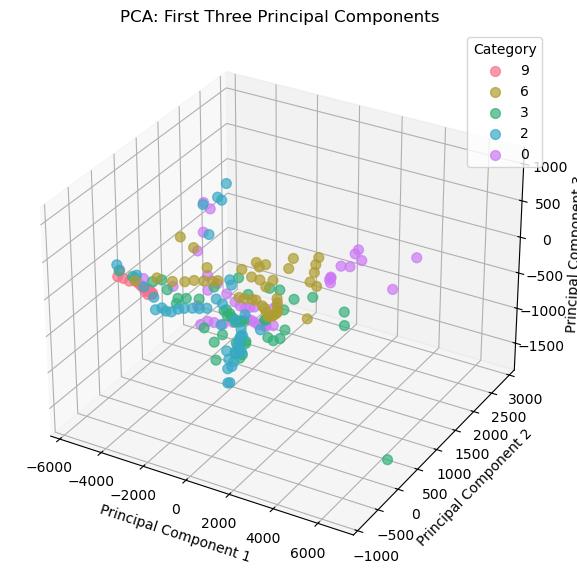

In [14]:
# Create a 3D scatter plot with categories as colors
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Assign unique colors to each category
unique_categories = categories.unique()
palette = sns.color_palette("husl", len(unique_categories))  # Generate distinct colors
color_map = {category: palette[i] for i, category in enumerate(unique_categories)}

# Plot each point with its corresponding category color
for category in unique_categories:
    subset = pc_df[pc_df["Category"] == category]
    ax.scatter(subset["PC1"], subset["PC2"], subset["PC3"], 
               label=category, alpha=0.7, s=50, c=[color_map[category]])

# Labels, title, and legend
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("PCA: First Three Principal Components")
ax.legend(title="Category")  # Show category legend

# Show plot
plt.show()